In [8]:
graph = {}
e = ("hello there", "how are you")
dst_v= (1, "1", 0)
graph[dst_v[0]] = graph.get(dst_v[0], {"outgoing": [], "incoming": []})["incoming"] + [e] 

TypeError: unsupported operand type(s) for +: 'dict' and 'list'

In [7]:
graph

{1: [('hello there', 'how are you')]}

In [3]:
import pandas as pd

In [48]:
card_dict = {}
with open('data/account') as f:
    for line in f:
        id, name, _, _ = line.split(",")
        card_dict[id] = name

In [41]:
card_dict["799999"]
684821

'Jobs'

In [47]:
df = pd.read_csv('data/account_to_account', sep=",", names=["src", "tgt","_1", "amt", "strategy","_2", "bus","_3","_4","_5","_6","_7","_8"], header=None)
df

,src,tgt,_1,amt,strategy,_2,bus,_3,_4,_5,_6,_7,_8
0,284452,734522,1591541159105,0.0,strategy_name-2,1591541151019206,buscode2,NaN,NaN,NaN,NaN,NaN,NaN
1,734522,284452,1589444855487,50.0,strategy_name-1,1589444851198131,buscode2,NaN,NaN,NaN,NaN,NaN,NaN
2,785045,318621,1591480309180,9.0,strategy_name-2,1591480301104093,buscode2,NaN,NaN,NaN,NaN,NaN,NaN
3,318621,785045,1588981218768,11.0,strategy_name-1,158898121665402,buscode3,NaN,NaN,NaN,NaN,NaN,NaN
4,785045,318621,1590596558466,3.0,strategy_name-3,159059655704811,buscode3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010507,292418,353258,1590538003773,5.0,strategy_name-2,159053800382330,buscode1,NaN,NaN,NaN,NaN,NaN,NaN
6010508,309564,163379,1590887473301,0.0,strategy_name-3,159088747473330,buscode3,NaN,NaN,NaN,NaN,NaN,NaN
6010509,163379,309564,1591576808257,50.0,strategy_name-1,1591576801122775,buscode1,NaN,NaN,NaN,NaN,NaN,NaN
6010510,540919,727046,1591476332783,0.0,strategy_name-2,1591476331268538,buscode3,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df = df[["src", "tgt", "amt", "strategy", "bus"]]

In [53]:
df["src_name"] = df["src"].apply(lambda x: card_dict[str(x)])

/var/folders/_m/blpl95d53ns5nqzldymg2s940000gn/T/ipykernel_10867/410251005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["src_name"] = df["src"].apply(lambda x: card_dict[str(x)])


In [54]:
df["tgt_name"] = df["tgt"].apply(lambda x: card_dict[str(x)])

/var/folders/_m/blpl95d53ns5nqzldymg2s940000gn/T/ipykernel_10867/3467949693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tgt_name"] = df["tgt"].apply(lambda x: card_dict[str(x)])


In [58]:
df.to_csv("data/acc2acc.csv", index=False)

In [61]:
df["tgt_name"].unique()

array(['John', 'Jobs', 'Mike'], dtype=object)

In [ ]:
# account ids are 0-799999
# card ids are from 0-599999

# Types = 0 (card) 1 (account)
# names = ['John', 'Jobs', 'Mike'] (0, 1, 2)

In [62]:
dft = pd.read_csv("data/acc2card.csv")

In [68]:
df["strategy"] = df["strategy"].apply(lambda x: int(x.replace("strategy_name-", "")))
df["bus"] = df["bus"].apply(lambda x: int(x.replace("buscode", "")))

/var/folders/_m/blpl95d53ns5nqzldymg2s940000gn/T/ipykernel_10867/1493206207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["strategy"] = df["strategy"].apply(lambda x: int(x.replace("strategy_name-", "")))
/var/folders/_m/blpl95d53ns5nqzldymg2s940000gn/T/ipykernel_10867/1493206207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bus"] = df["bus"].apply(lambda x: int(x.replace("buscode", "")))


In [70]:
df["type"] = 1
dft["type"] = 0

/var/folders/_m/blpl95d53ns5nqzldymg2s940000gn/T/ipykernel_10867/2765373401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type"] = 1


In [72]:
df = pd.concat([dft, df])

In [27]:
df.to_csv("data/full.csv", index=False)

In [1]:
len(df)

NameError: name 'df' is not defined

In [81]:
a = (1, 2,3)
b = (1, 3, 2)

In [82]:
a == b

False

In [89]:
a[:1] < b[:1]

False

In [93]:
t = [1, 2, 3]

[h for h in t if h%2]

[1, 3]

In [94]:
import math

math.floor(44.0)

44

In [96]:
df.columns

Index(['src', 'tgt', 'amt', 'strategy', 'bus', 'src_name', 'tgt_name', 'type'], dtype='object')

In [4]:
df = pd.read_csv("data/full.csv")

In [21]:
df[["src", "tgt", "amt", "strategy", "bus"]].value_counts()

src     tgt     amt   strategy  bus
0       83648   20.0  6         3      1
532435  778555  0.0   3         2      1
        230823  10.0  5         2      1
        249537  2.0   3         1      1
                20.0  3         3      1
                                      ..
265970  71182   13.0  5         2      1
                0.0   6         2      1
265969  753648  7.0   3         1      1
        584464  0.0   3         2      1
799999  758964  0.0   3         1      1
Length: 9278130, dtype: int64

In [26]:
df["src_name"].value_counts()

Mike    4644499
John    2778945
Jobs    1854686
Name: src_name, dtype: int64

In [27]:
df[df["src"]==df["tgt"]]

,src,tgt,amt,strategy,bus,src_name,tgt_name,type
3229699,39508,39508,1.0,4,3,Mike,John,0
3229700,39508,39508,0.0,4,1,Mike,John,0
3229701,39508,39508,2.0,4,1,Mike,John,0


In [24]:
df[df["src"]==158998][df["tgt"] == 237912]

/var/folders/_m/blpl95d53ns5nqzldymg2s940000gn/T/ipykernel_50209/4243612061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["src"]==158998][df["tgt"] == 237912]


,src,tgt,amt,strategy,bus,src_name,tgt_name,type
50,158998,237912,0.0,4,2,John,Jobs,0
51,158998,237912,1.0,4,1,John,Jobs,0
52,158998,237912,30.0,4,3,John,Jobs,0
53,158998,237912,0.0,4,2,John,Jobs,0
54,158998,237912,22.0,4,1,John,Jobs,0


In [26]:
df = df.drop_duplicates()

In [1]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv("data/full.csv")

In [43]:
df["edge"] = df["src_name"].astype(str) + "-" + df["tgt_name"].astype(str) + "-" + df["type"].astype(str) + "-" + df["strategy"].astype(str) + "-" + df["bus"].astype(str) + "-" + df["amt"].astype(str)

In [65]:
df["edge_cnt"] = df.groupby(['edge'])["src"].transform('count')

In [71]:
df = df[df["edge_cnt"] >= 10000]

In [73]:
df

,src,tgt,amt,strategy,bus,src_name,tgt_name,type,edge,edge_cnt
1,684821,434860,0.0,4,3,John,Jobs,0,John-Jobs-0-4-3-0.0,17835
14,560748,335543,1.0,4,2,Mike,John,0,Mike-John-0-4-2-1.0,12760
15,318441,596574,0.0,4,3,Mike,Jobs,0,Mike-Jobs-0-4-3-0.0,29878
16,355194,383388,1.0,4,3,Mike,John,0,Mike-John-0-4-3-1.0,12642
18,519856,469818,0.0,4,1,Mike,Jobs,0,Mike-Jobs-0-4-1-0.0,29886
...,...,...,...,...,...,...,...,...,...,...
9278117,722091,702589,0.0,3,1,Jobs,Mike,1,Jobs-Mike-1-3-1-0.0,47839
9278119,102535,81149,3.0,3,1,Mike,Mike,1,Mike-Mike-1-3-1-3.0,13547
9278120,232061,559376,0.0,3,2,Jobs,Jobs,1,Jobs-Jobs-1-3-2-0.0,19267
9278126,309564,163379,0.0,3,3,Mike,Jobs,1,Mike-Jobs-1-3-3-0.0,48242


In [74]:
df[["src", "tgt", "amt", "strategy", "bus", "src_name", "tgt_name", "type"]].to_csv("data/new_full.csv", index=False)

In [29]:
df[df["src"] == 434860]

,src,tgt,amt,strategy,bus,src_name,tgt_name,type


In [32]:
src_ids = set(df["src"])
dst_ids = set(df["tgt"])

In [33]:
len(dst_ids)

27291

In [35]:
len([id for id in dst_ids if id in src_ids])

25528

In [43]:
len(df["src"].unique()) + len(df["tgt"].unique())

1534800

In [39]:
edges = np.zeros((2,2))

ValueError: could not convert string to float: 'hello'

In [1]:
import json


In [80]:
# Data to be written
dictionary = {
    "name": "sathiyajith",
    "rollno": 56,
    "cgpa": 8.6,
    "phonenumber": "9976770500"
}
 
# Serializing json
json_object = json.dumps([dictionary, dictionary], indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [93]:
obj = {'frequency': 12198, 'orig': [(536637, 584924, 'Mike', 'John', '0.0-5-3-0'), (584924, 189831, 'John', 'Mike', '2.0-3-2-1'), (189831, 48282, 'Mike', 'Mike', '2.0-4-1-0')]}
newobj = {'frequency': obj['frequency'], "nodes": [], "edges": []}
for i, e in enumerate(obj['orig']):
    newobj["nodes"].append({"node_id": i, "name": e[2]})
    amt, strategy, bus, type = e[4].split("-")
    newobj["edges"].append({"source_node_id": e[0], "target_node_id": e[1], "amt": int(float(amt)), "strategy_name": strategy, "buscode": bus, "type": "account-to-card" if int(type) else "account-to-account"})
    if i == 2:
        newobj["nodes"].append({"id": i+1, "name": e[3]})

print(obj)
print(newobj)

{'frequency': 12198, 'orig': [(536637, 584924, 'Mike', 'John', '0.0-5-3-0'), (584924, 189831, 'John', 'Mike', '2.0-3-2-1'), (189831, 48282, 'Mike', 'Mike', '2.0-4-1-0')]}
{'frequency': 12198, 'nodes': [{'node_id': 0, 'name': 'Mike'}, {'node_id': 1, 'name': 'John'}, {'node_id': 2, 'name': 'Mike'}, {'id': 3, 'name': 'Mike'}], 'edges': [{'source_node_id': 536637, 'target_node_id': 584924, 'amt': 0, 'strategy_name': '5', 'buscode': '3', 'type': 'account-to-account'}, {'source_node_id': 584924, 'target_node_id': 189831, 'amt': 2, 'strategy_name': '3', 'buscode': '2', 'type': 'account-to-card'}, {'source_node_id': 189831, 'target_node_id': 48282, 'amt': 2, 'strategy_name': '4', 'buscode': '1', 'type': 'account-to-account'}]}


In [94]:
# Serializing json
json_object = json.dumps([newobj], indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [1]:
import json
with open("res.json", "r") as f:
    data = json.load(f)
len(data)

15034

In [2]:
temp = []
pats = []
for d in data:
    vertices = set()
    pat = ""
    first = d["edges"][0]["source_node_id"]
    last = d["edges"][-1]["source_node_id"]
    for e in d["edges"]:
        vertices.add(e["source_node_id"])
        vertices.add(e["target_node_id"])
        pat += ("l" if e["source_node_id"] > e["target_node_id"] else "r")
    if len(vertices) == 3 and first == last:
        temp.append(d)
        pats.append(pat)


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
len(temp)

291

[{'source_node_id': 1010, 'target_node_id': 684821, 'amt': 0, 'strategy_name': '3', 'buscode': '1', 'type': 'account-to-account'}, {'source_node_id': 1010, 'target_node_id': 190387, 'amt': 0, 'strategy_name': '3', 'buscode': '3', 'type': 'account-to-account'}, {'source_node_id': 1010, 'target_node_id': 190387, 'amt': 0, 'strategy_name': '2', 'buscode': '3', 'type': 'account-to-account'}]


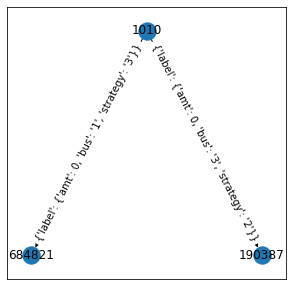

In [24]:
for j, t in enumerate(temp):
    graph = nx.DiGraph()
    edges = t["edges"]
    vs = {}
    t = False
    idx = 0
    for i,e in enumerate(edges):
        graph.add_edge(e["source_node_id"], e["target_node_id"], label={"amt": e["amt"], "bus": e["buscode"], "strategy": e["strategy_name"]})
        graph.add_node(e["source_node_id"])
        graph.add_node(e["target_node_id"])
    idx = 0

    if j == 12:
        print(edges)
        fsize = (5, 5)
        plt.figure(figsize=fsize)
        pos = nx.spectral_layout(graph)
        nx.draw_networkx(graph, pos, arrows=True)
        nx.draw_networkx_edge_labels(graph,pos)
        # plt.savefig(f"figs/{j}.png")
        plt.show()



In [91]:
len(temp)

359